# Lab 1

In [1]:
%pip install numpy matplotlib scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


## Task 1: Data Generation

* Generate a synthetic data set with two real-valued variables X and Y such
that Y depends linearly from X;

In [224]:
# Quantity of records
N1 = 50
range1 = (0, 1000)

# Generating data for X feature
x1 = np.random.uniform(range1[0], range1[1], N1)

# Generating data for Y where it depends linearly from X
y1 = x1

* Generate a synthetic data set with two real-valued variables X and Y such
that Y depends quadratically from X; 

In [285]:
# Quantity of records
N2 = 50
range2 = (0, 50)

# Generating data for X feature
x2 = np.random.uniform(range2[0], range2[1], N2)

# Generating data for Y where it depends quadratically from X
y2 = x2 ** 2

* Add Gaussian noise (e.g. with standard deviation 1) to output variable Y
in both data sets.

In [291]:
# Creating the noise using normal distribution (gaussian)
noise_y1 = np.random.normal(0, 20, y1.shape)
noise_y2 = np.random.normal(0, 20, y2.shape)

# Adding noise to Y
Y1 = y1 + noise_y1
Y2 = y2 + noise_y2

* Plot both data sets and the true regression functions in the X, Y space. 

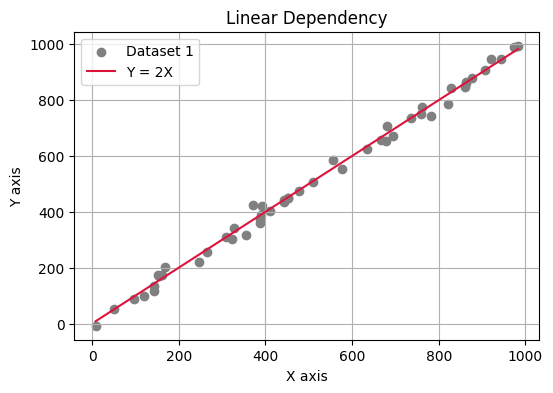

In [292]:
plt.figure(figsize=(6, 4))

# Scatter plot for dataset 1
plt.scatter(x1, Y1, c='gray', label='Dataset 1')

# True function for dataset 1
x1_line = np.linspace(min(x1), max(x1), 100)
y1_line = x1_line
plt.plot(x1_line, y1_line, 'crimson', label='Y = 2X')

# Additional settings
plt.title('Linear Dependency')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.grid(True)
plt.show()

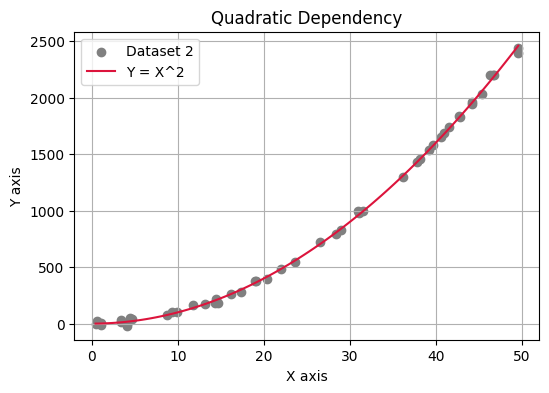

In [289]:
plt.figure(figsize=(6, 4))

# Scatter plot for dataset 1
plt.scatter(x2, Y2, c='gray', label='Dataset 2')

# True function for dataset 1
x2_line = np.linspace(min(x2), max(x2), 100)
y2_line = x2_line ** 2
plt.plot(x2_line, y2_line, 'crimson', label='Y = X^2')

# Additional settings
plt.title('Quadratic Dependency')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.grid(True)
plt.show()

## Task 2: Model Training With Polynomial Regression

* Define polynomial regression models with varying degrees (model complexities)

In [293]:
# Creating polynomial regression models
degrees = [1, 3, 5, 7, 9, 11]
degrees_data = {}

for degree in degrees:

    print(f"\nGenerating models for degree: {degree}")

    # Splitting data
    X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1, Y1, test_size=0.3, random_state=42)
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, Y2, test_size=0.3, random_state=42)
    
    # Creating polynomials model
    poly1 = PolynomialFeatures(degree=degree, include_bias=False)
    X1_poly = poly1.fit_transform(X1_train.reshape(-1, 1))

    poly2 = PolynomialFeatures(degree=degree, include_bias=False)
    X2_poly = poly2.fit_transform(X2_train.reshape(-1, 1))

    # Trainining models
    model1 = LinearRegression()
    model1.fit(X1_poly, Y1_train)
    model2 = LinearRegression()
    model2.fit(X2_poly, Y2_train)

    # Saving results
    degrees_data[degree] = {
        'degree': degree,
        'model1': model1,
        'model2': model2,
        'poly1': poly1,
        'poly2': poly2,
        'X1_test': X1_test,
        'X2_test': X2_test,
        'Y1_test': Y1_test,
        'Y2_test': Y2_test
    }


Generating models for degree: 1

Generating models for degree: 3

Generating models for degree: 5

Generating models for degree: 7

Generating models for degree: 9

Generating models for degree: 11


* Train polynomial regression models with varying degrees and predict on
both data sets.

=============================================== [PREDICTION FOR DEGREE 1]


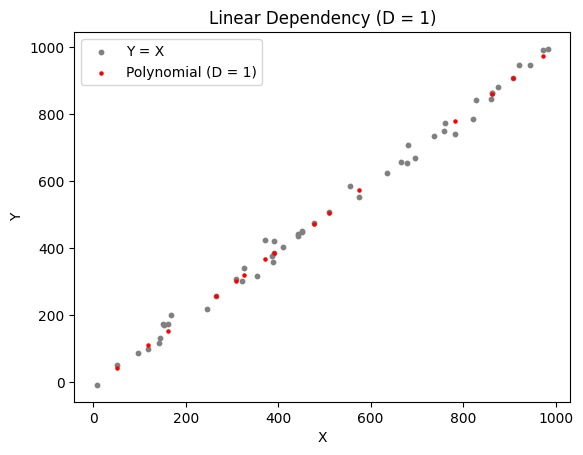

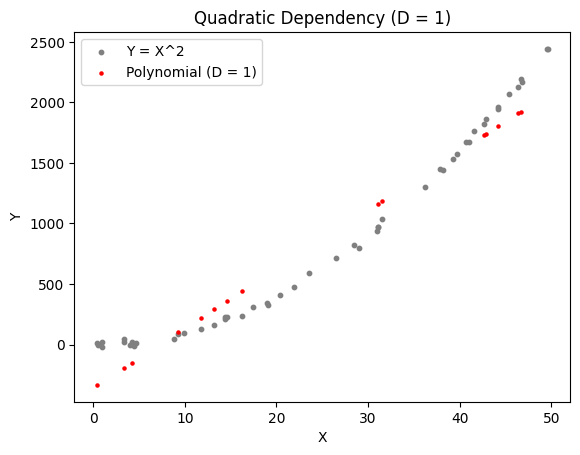

=============================================== [PREDICTION FOR DEGREE 3]


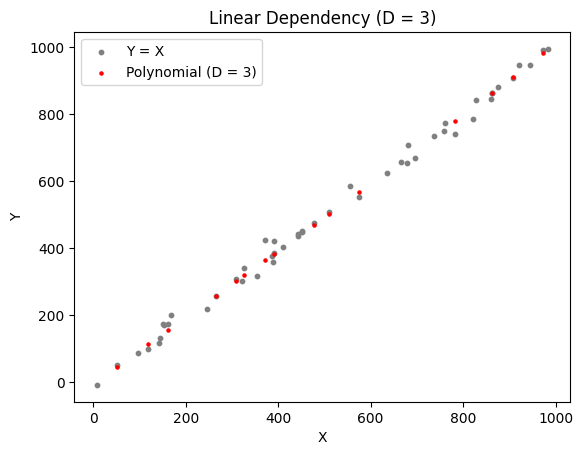

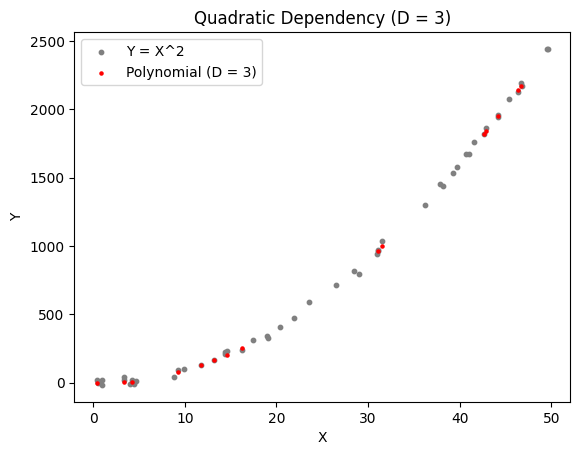

=============================================== [PREDICTION FOR DEGREE 5]


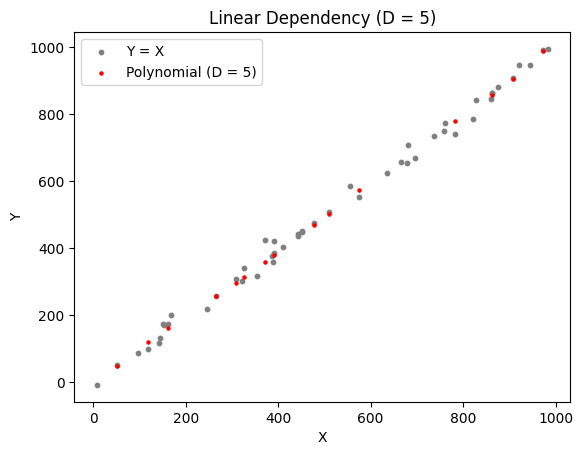

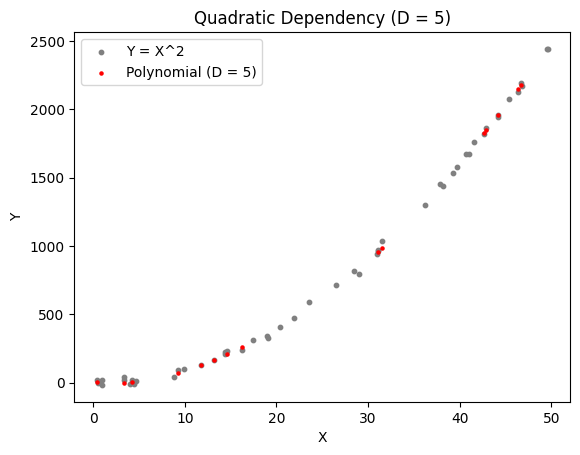

=============================================== [PREDICTION FOR DEGREE 7]


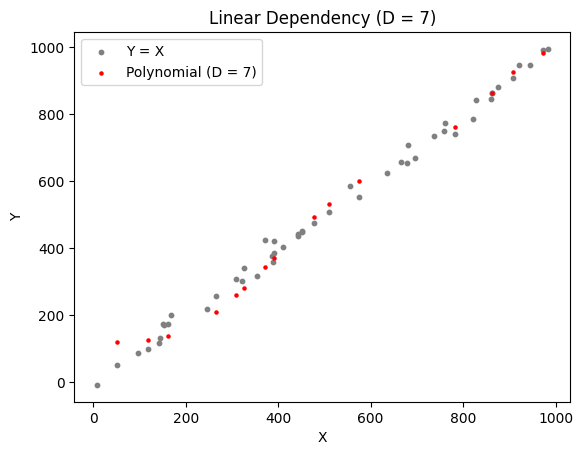

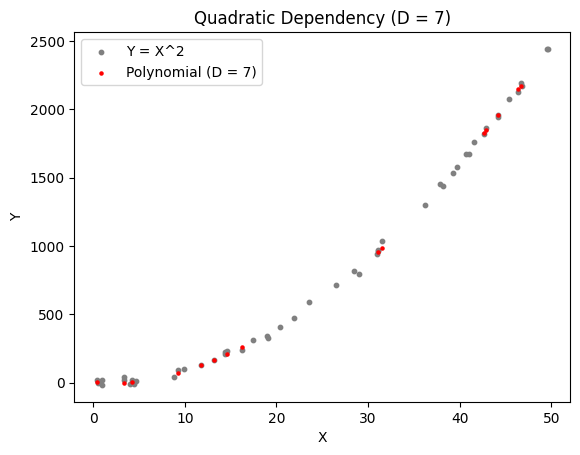

=============================================== [PREDICTION FOR DEGREE 9]


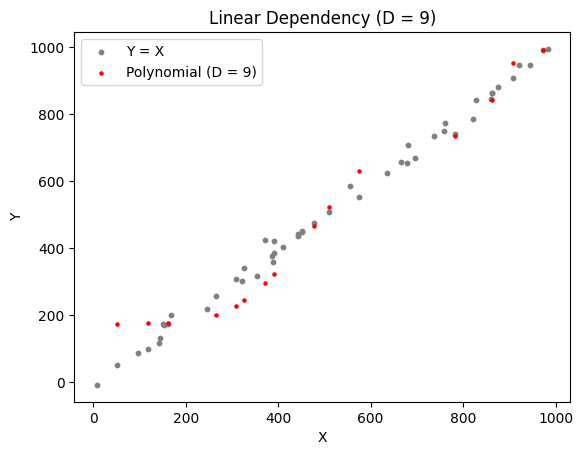

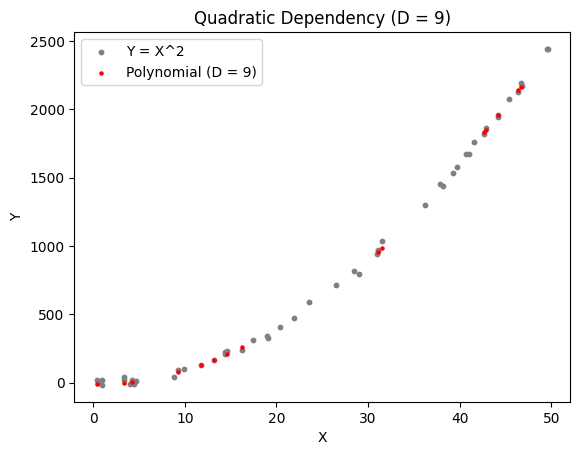

=============================================== [PREDICTION FOR DEGREE 11]


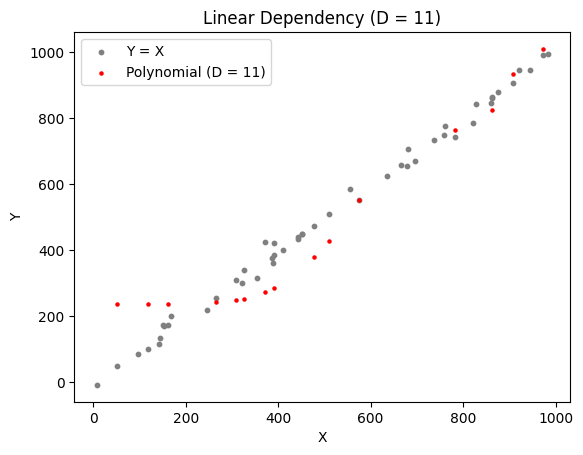

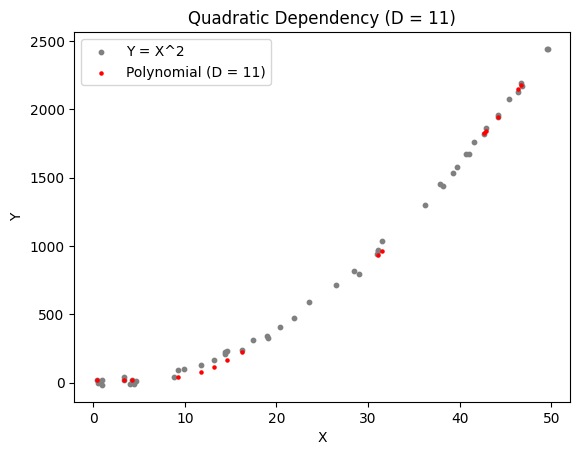

In [294]:

for degree, data_model in degrees_data.items():
    print(f"=============================================== [PREDICTION FOR DEGREE {degree}]")
    poly1 = data_model['poly1']
    poly2 = data_model['poly2']
    X1_test = data_model['X1_test']
    X2_test = data_model['X2_test']
    model1 = data_model['model1']
    model2 = data_model['model2']
    
    # Predicting
    X1_poly = poly1.transform(X1_test.reshape(-1, 1))
    X2_poly = poly2.transform(X2_test.reshape(-1, 1))
    Y1_pred = model1.predict(X1_poly)
    Y2_pred = model2.predict(X2_poly)

    # Plotting the linear model
    plt.scatter(x1, Y1, color='gray', label='Y = X', s=10)
    plt.scatter(X1_test, Y1_pred, color='red', label=f'Polynomial (D = {degree})', s=5)
    plt.legend()
    plt.title(f'Linear Dependency (D = {degree})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    # Plotting the quadratic model
    plt.scatter(x2, Y2, color='gray', label='Y = X^2', s=10)
    plt.scatter(X2_test, Y2_pred, color='red', label=f'Polynomial (D = {degree})', s=5)
    plt.legend()
    plt.title(f'Quadratic Dependency (D = {degree})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

## Task 3: Bias-Variance Decomposition


* Estimate bias, variance, irreducible error, and total error for each polynomial regression model on the linear and quadratic data sets.

In [295]:
def bias_variance_decomposition(X_train, y_train, X_test, y_test, y_true_test, degree, n_trials=2000):
    # ensure 1D
    X_train = np.asarray(X_train).ravel()
    y_train = np.asarray(y_train).ravel()
    X_test  = np.asarray(X_test).ravel()
    y_test  = np.asarray(y_test).ravel()
    y_true_test = np.asarray(y_true_test).ravel()

    predictions = []

    for _ in range(n_trials):
        # bootstrap with replacement
        idx = np.random.randint(0, len(X_train), size=len(X_train))
        Xb, yb = X_train[idx], y_train[idx]

        poly = PolynomialFeatures(degree=degree, include_bias=False)
        Xb_poly = poly.fit_transform(Xb.reshape(-1, 1))
        X_test_poly = poly.transform(X_test.reshape(-1, 1))

        model = LinearRegression()
        model.fit(Xb_poly, yb)
        predictions.append(model.predict(X_test_poly))

    predictions = np.array(predictions)  # (n_trials, n_test)
    mean_pred = predictions.mean(axis=0)

    # Bias^2: against noiseless y_true_test
    bias_squared = np.mean((mean_pred - y_true_test) ** 2)

    # Variance: variability of predictions across trials
    variance = np.mean(np.var(predictions, axis=0))

    # Average MSE vs noisy y_test (for reporting)
    avg_mse = np.mean(np.mean((predictions - y_test) ** 2, axis=1))

    # Noise: estimate from residual
    noise = max(avg_mse - bias_squared - variance, 0.0)

    total_error = bias_squared + variance + noise

    return {
        "bias_squared": bias_squared,
        "variance": variance,
        "noise": noise,
        "total_error": total_error,
        "actual_mse": avg_mse
    }

In [296]:
# Linear Dataset Results
print("=" * 60)
print("BIAS-VARIANCE DECOMPOSITION FOR LINEAR DATASET")
print("=" * 60)

for degree in degrees:
    X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1, Y1, test_size=0.3, random_state=42)
    y1_true_test = X1_test
    errors = bias_variance_decomposition(X1_train, Y1_train, X1_test, Y1_test, y1_true_test, degree, n_trials=200)
    print(f"\nDegree {degree}:")
    print(f"  Bias²:       {errors['bias_squared']:.4f}")
    print(f"  Variance:    {errors['variance']:.4f}")
    print(f"  Noise:       {errors['noise']:.4f}")
    print(f"  Total Error: {errors['total_error']:.4f}")
    print(f"  Actual MSE:  {errors['actual_mse']:.4f}")

BIAS-VARIANCE DECOMPOSITION FOR LINEAR DATASET

Degree 1:
  Bias²:       29.7178
  Variance:    22.7199
  Noise:       501.0596
  Total Error: 553.4973
  Actual MSE:  553.4973

Degree 3:
  Bias²:       42.0205
  Variance:    46.3112
  Noise:       504.9486
  Total Error: 593.2802
  Actual MSE:  593.2802

Degree 5:
  Bias²:       109.3959
  Variance:    142.8910
  Noise:       542.5047
  Total Error: 794.7916
  Actual MSE:  794.7916

Degree 7:
  Bias²:       1039.0762
  Variance:    559.1025
  Noise:       837.1400
  Total Error: 2435.3187
  Actual MSE:  2435.3187

Degree 9:
  Bias²:       4920.1486
  Variance:    13169.1741
  Noise:       1713.5483
  Total Error: 19802.8709
  Actual MSE:  19802.8709

Degree 11:
  Bias²:       33777.3415
  Variance:    459704.4080
  Noise:       3152.7345
  Total Error: 496634.4839
  Actual MSE:  496634.4839


In [297]:
# Quadratic Dataset Results
print("=" * 60)
print("BIAS-VARIANCE DECOMPOSITION FOR QUADRATIC DATASET")
print("=" * 60)

for degree in degrees:
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, Y2, test_size=0.3, random_state=42)
    y2_true_test = X2_test ** 2
    errors = bias_variance_decomposition(X2_train, Y2_train, X2_test, Y2_test, y2_true_test, degree, n_trials=200)
    print(f"\nDegree {degree}:")
    print(f"  Bias²:       {errors['bias_squared']:.4f}")
    print(f"  Variance:    {errors['variance']:.4f}")
    print(f"  Noise:       {errors['noise']:.4f}")
    print(f"  Total Error: {errors['total_error']:.4f}")
    print(f"  Actual MSE:  {errors['actual_mse']:.4f}")

BIAS-VARIANCE DECOMPOSITION FOR QUADRATIC DATASET

Degree 1:
  Bias²:       33187.9615
  Variance:    3167.3365
  Noise:       1813.5240
  Total Error: 38168.8220
  Actual MSE:  38168.8220

Degree 3:
  Bias²:       50.1865
  Variance:    40.4821
  Noise:       381.2410
  Total Error: 471.9096
  Actual MSE:  471.9096

Degree 5:
  Bias²:       61.3398
  Variance:    67.0461
  Noise:       434.2762
  Total Error: 562.6621
  Actual MSE:  562.6621

Degree 7:
  Bias²:       76.3146
  Variance:    285.3563
  Noise:       435.7597
  Total Error: 797.4305
  Actual MSE:  797.4305

Degree 9:
  Bias²:       97.2389
  Variance:    768.6085
  Noise:       421.2653
  Total Error: 1287.1127
  Actual MSE:  1287.1127

Degree 11:
  Bias²:       1121.8834
  Variance:    12950.7369
  Noise:       296.6843
  Total Error: 14369.3046
  Actual MSE:  14369.3046


## Task 4: Visualization and Analysis

In [306]:

def collect_metrics_over_degrees(X, Y, degrees, f_true, n_trials=200):
    rows = []
    for degree in degrees:
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
        y_true_test = f_true(X_test) 
        metrics = bias_variance_decomposition(
            X_train, Y_train, X_test, Y_test, y_true_test,
            degree=degree, n_trials=n_trials
        )
        rows.append({
            "degree": degree,
            "bias2": metrics["bias_squared"],
            "variance": metrics["variance"],
            "noise": metrics["noise"],
            "total_error": metrics["total_error"],
            "avg_mse": metrics["actual_mse"]
        })
    return rows

In [307]:
def to_arrays(rows):
    rows_sorted = sorted(rows, key=lambda r: r["degree"])
    degrees_arr = np.array([r["degree"] for r in rows_sorted])
    bias2_arr   = np.array([r["bias2"] for r in rows_sorted])
    var_arr     = np.array([r["variance"] for r in rows_sorted])
    noise_arr   = np.array([r["noise"] for r in rows_sorted])
    total_arr   = np.array([r["total_error"] for r in rows_sorted])
    mse_arr     = np.array([r["avg_mse"] for r in rows_sorted])
    return degrees_arr, bias2_arr, var_arr, noise_arr, total_arr, mse_arr

In [318]:
def plot_bias_variance_curves(title, degrees, bias2, variance, noise, total, mse=None):
    plt.figure(figsize=(7, 4.5))
    plt.plot(degrees, bias2, color='black',    marker='o', label='Bias²')
    plt.plot(degrees, variance, color='green', marker='o', label='Variance')
    plt.plot(degrees, total, color='red',    marker='o', linestyle='dashed', label='Total Error = Bias²+Var+Noise')
    plt.xticks(list(range(1,11,2)))
    plt.xlabel('Complexity (degree)')
    plt.ylabel('Error')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

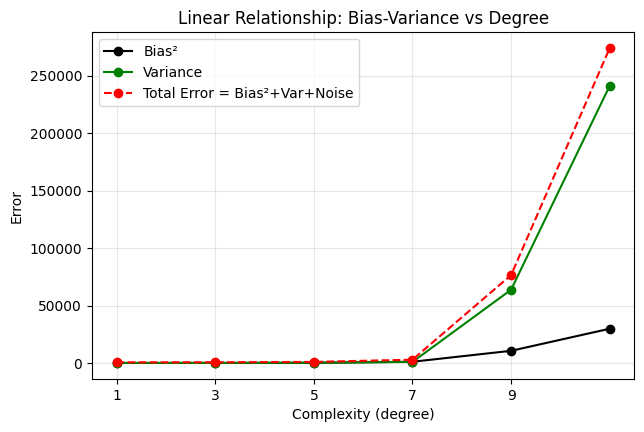

In [324]:
f_true = lambda x: x
rows_lin = collect_metrics_over_degrees(x1, Y1, degrees, f_true, n_trials=200)
deg_lin, b2_lin, v_lin, n_lin, t_lin, mse_lin = to_arrays(rows_lin)
plot_bias_variance_curves("Linear Relationship: Bias-Variance vs Degree", deg_lin, b2_lin, v_lin, n_lin, t_lin, mse=mse_lin)

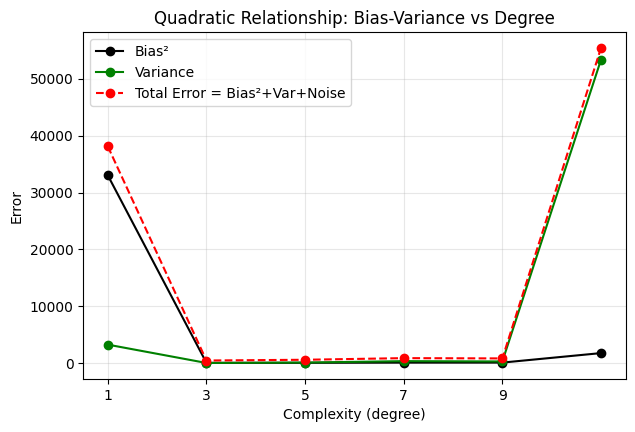

In [327]:
f_true = lambda x: x ** 2
rows_lin = collect_metrics_over_degrees(x2, Y2, degrees, f_true, n_trials=200)
deg_lin, b2_lin, v_lin, n_lin, t_lin, mse_lin = to_arrays(rows_lin)
plot_bias_variance_curves("Quadratic Relationship: Bias-Variance vs Degree", deg_lin, b2_lin, v_lin, n_lin, t_lin, mse=mse_lin)